In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import Image, display

%matplotlib inline

In [34]:
# Load in files
hdb_bb1_3D_data = pd.read_csv('files/hdb_bb1_3D_data.csv')
hdb_bb2_3D_data = pd.read_csv('files/hdb_bb2_3D_data.csv')
hdb_bb3_3D_data = pd.read_csv('files/hdb_bb3_3D_data.csv')

total_compounds = pd.read_csv('../data_preparation/output/total_compounds.csv')
print(len(total_compounds))
display(total_compounds.head(5))

4850734


,structure,read_count,bb1,bb2,bb3
0,C=CCC(O)(CC=C)CN(C)C(=O)C1CC(C)(C(=O)NCCC(c2cc...,198,C=CCC(O)(CN)CC=C,CC1(CC(C1)C(=O)O)C(=O)O,NCCC(C1=CC=C(F)C=C1)C1=CC=CO1
1,C=CCC(O)(CC=C)CN(C)C(=O)C1CC(C)(C(=O)NCCC(c2cc...,121,C=CCC(O)(CN)CC=C,CC1(CC(C1)C(=O)O)C(=O)O,NCCC(C1=CC=CC=C1)C1=CC=CC=C1
2,C=CCC(O)(CC=C)CN(C)C(=O)C1CC2(C1)C(C(=O)NCCC(c...,85,C=CCC(O)(CN)CC=C,C1C(CC12C(C2(F)F)C(=O)O)C(=O)O,NCCC(C1=CC=C(F)C=C1)C1=CC=CO1
3,C=CCC(O)(CC=C)CN(C)C(=O)C1CC2(CC(C(=O)NCC3(CC(...,108,C=CCC(O)(CN)CC=C,C1C(CC12CC(C2)C(=O)O)C(=O)O,CC(C)CC1(CN)CCC1
4,C=CCC(O)(CC=C)CN(C)C(=O)C1CC2(CC(C(=O)NCC3(c4c...,1587,C=CCC(O)(CN)CC=C,C1C(CC12CC(C2)C(=O)O)C(=O)O,NCC1(C2=CC=C(Cl)C=C2)CCC1


In [48]:
bb2_active = hdb_bb2_3D_data.loc[hdb_bb2_3D_data['P(active)'] > 0]
print(len(bb2_active.loc[bb2_active['Cluster'] == 2])/len(bb2_active))
print(len(bb2_active.loc[bb2_active['Cluster'] == 3])/len(bb2_active))

0.2046783625730994
0.5146198830409356


In [35]:
# Merge all building blocks assigned to a position with active compounds
clustered_bb1 = hdb_bb1_3D_data.loc[hdb_bb1_3D_data['Cluster'] != 0]
clustered_bb2 = hdb_bb2_3D_data.loc[hdb_bb2_3D_data['Cluster'] != 0]
clustered_bb3 = hdb_bb3_3D_data.loc[hdb_bb3_3D_data['Cluster'] != 0]

In [36]:
total_merged = total_compounds.merge(clustered_bb1[['P(active)', 'Cluster', 'SMILES']], left_on='bb1', right_on='SMILES')\
    .drop(columns=['SMILES']).rename(columns={'Cluster': 'bb1_Cluster', 'P(active)': 'P(active)_1'})\
    .merge(clustered_bb2[['P(active)', 'Cluster', 'SMILES']], left_on='bb2', right_on='SMILES')\
    .drop(columns=['SMILES']).rename(columns={'Cluster': 'bb2_Cluster', 'P(active)': 'P(active)_2'})\
    .merge(clustered_bb3[['P(active)', 'Cluster', 'SMILES']], left_on='bb3', right_on='SMILES')\
    .drop(columns=['SMILES']).rename(columns={'Cluster': 'bb3_Cluster', 'P(active)': 'P(active)_3'})
total_merged

,structure,read_count,bb1,bb2,bb3,P(active)_1,bb1_Cluster,P(active)_2,bb2_Cluster,P(active)_3,bb3_Cluster
0,CNC(=O)[C@H]1CC[C@H](CNC(=O)c2cc3scc(C(=O)NCC4...,321,C1[C@@H](CC[C@H](C1)C(=O)O)CN,c1c2c(c(cs2)C(=O)O)sc1C(=O)O,NCC1(C2=CC=C(Cl)C=C2)CCC1,0.052879,4,0.517153,3,0.839893,25
1,CN(Cc1cnn(-c2cccc(F)c2)c1)C(=O)c1cc2scc(C(=O)N...,1470,NCC1=CN(C2=CC(F)=CC=C2)N=C1,c1c2c(c(cs2)C(=O)O)sc1C(=O)O,NCC1(C2=CC=C(Cl)C=C2)CCC1,0.175488,1,0.517153,3,0.839893,25
2,CN(Cc1ccccc1)C(=O)c1cc2scc(C(=O)NCC3(c4ccc(Cl)...,1045,NCC1=CC=CC=C1,c1c2c(c(cs2)C(=O)O)sc1C(=O)O,NCC1(C2=CC=C(Cl)C=C2)CCC1,0.055397,3,0.517153,3,0.839893,25
3,CN(Cc1ccoc1)C(=O)c1cc2scc(C(=O)NCC3(c4ccc(Cl)c...,573,NCC1=COC=C1,c1c2c(c(cs2)C(=O)O)sc1C(=O)O,NCC1(C2=CC=C(Cl)C=C2)CCC1,0.065728,3,0.517153,3,0.839893,25
4,CN(Cc1cc(Cl)cc(Cl)c1)C(=O)c1cc2scc(C(=O)NCC3(c...,1665,NCC1=CC(Cl)=CC(Cl)=C1,c1c2c(c(cs2)C(=O)O)sc1C(=O)O,NCC1(C2=CC=C(Cl)C=C2)CCC1,0.131096,3,0.517153,3,0.839893,25
...,...,...,...,...,...,...,...,...,...,...,...
526933,CNC(=O)c1ccc([C@H](C)NC(=O)c2cc(CNCCOc3ccccc3O...,0,C[C@@H](c1ccc(cc1)C(=O)O)N,O=CC1=CC(C(=O)O)=C(F)C=C1,COC1=C(OCCN)C=CC=C1,0.000086,4,0.000000,3,0.000000,49
526934,CNC(=O)[C@H](Cc1ccc(C)cc1)NC(=O)c1cccc(CNCCOc2...,0,Cc1ccc(cc1)C[C@@H](C(=O)O)N,O=CC1=CC(C(=O)O)=CC=C1,COC1=C(OCCN)C=CC=C1,0.011260,8,0.000000,3,0.000000,49
526935,CNC(=O)[C@@H](C)NC(=O)c1ccc(CNCCOc2ccccc2OC)o1,0,C[C@H](C(=O)O)N,O=CC1=CC=C(C(=O)O)O1,COC1=C(OCCN)C=CC=C1,0.000814,6,0.000000,3,0.000000,49
526936,CCC(NC(=O)c1cccc(CNCc2ccc(-c3cc(Cl)cc(Cl)c3)cc...,0,CCC(C(=O)O)N,O=CC1=CC(C(=O)O)=CC=C1,NCC1=CC=C(C2=CC(Cl)=CC(Cl)=C2)C=C1,0.005150,6,0.000000,3,0.000000,56


In [37]:
#total_merged.to_csv('total_merged.csv', index=False)

### Now we can analyze the data 

We can start by doing groupbys and seeing if there are certain cluster combinations that lead to more active compounds. We can plot cluster ids on x and y axis, height of bar will be how many total compounds come from those cluster combinations and the color of the bar gives the proportion of active compounds

In [38]:
actives = total_merged.loc[total_merged['read_count'] > 0]
inactives = total_merged.loc[total_merged['read_count'] == 0]
#total_merged.groupby(['bb1_Cluster', 'bb2_Cluster'], as_index=False).count()

In [39]:
actives_12 = actives.groupby(['bb1_Cluster', 'bb2_Cluster'], as_index=False).count()
inactives_12 = inactives.groupby(['bb1_Cluster', 'bb2_Cluster'], as_index=False).count()
total_12 = pd.merge(actives_12[['bb1_Cluster', 'bb2_Cluster', 'structure']].rename(columns={'structure': 'n_active'}),
         inactives_12[['bb1_Cluster', 'bb2_Cluster', 'structure']].rename(columns={'structure': 'n_inactive'}),
         on=['bb1_Cluster', 'bb2_Cluster'], how='right')
total_12 = total_12.fillna(0)

total_12['log_total'] = total_12['n_active'] + total_12['n_inactive']
total_12['active_rate'] = total_12['n_active'] / (total_12['n_active'] + total_12['n_inactive'])

In [40]:
bb1_clusters = pd.DataFrame({'bb1_Cluster': np.unique(total_merged['bb1_Cluster'])})
bb2_clusters = pd.DataFrame({'bb2_Cluster': np.unique(total_merged['bb2_Cluster'])})
bb12_clusters = pd.merge(bb1_clusters, bb2_clusters, how='cross')
combined = bb12_clusters.merge(total_12, on=['bb1_Cluster', 'bb2_Cluster'], how='left')
combined = combined.fillna(0)
combined

,bb1_Cluster,bb2_Cluster,n_active,n_inactive,log_total,active_rate
0,1,1,0.0,0.0,0.0,0.000000
1,1,2,0.0,0.0,0.0,0.000000
2,1,3,3057.0,18088.0,21145.0,0.144573
3,2,1,0.0,891.0,891.0,0.000000
4,2,2,1.0,18441.0,18442.0,0.000054
5,2,3,6.0,1463.0,1469.0,0.004084
6,3,1,0.0,0.0,0.0,0.000000
7,3,2,0.0,0.0,0.0,0.000000
8,3,3,10901.0,184249.0,195150.0,0.055860
9,4,1,0.0,550.0,550.0,0.000000


In [18]:
# Initialize parameters for plot
lx_1_2 = len(np.unique(combined['bb1_Cluster']))
ly_1_2 = len(np.unique(combined['bb2_Cluster']))
xpos_1_2 = np.arange(lx_1_2-1, -1, -1)
ypos_1_2 = np.arange(0, ly_1_2, 1)
xpos_1_2, ypos_1_2 = np.meshgrid(xpos_1_2 + 0.35, ypos_1_2 + 0.25)
xpos_1_2 = xpos_1_2.flatten()
ypos_1_2 = ypos_1_2.flatten()
zpos_1_2 = np.zeros(lx_1_2*ly_1_2)

dx_1_2 = 0.25*np.ones_like(zpos_1_2)
dy_1_2 = dx_1_2.copy()
dz_1_2 = combined.sort_values(by=['bb1_Cluster', 'bb2_Cluster'])['log_total']

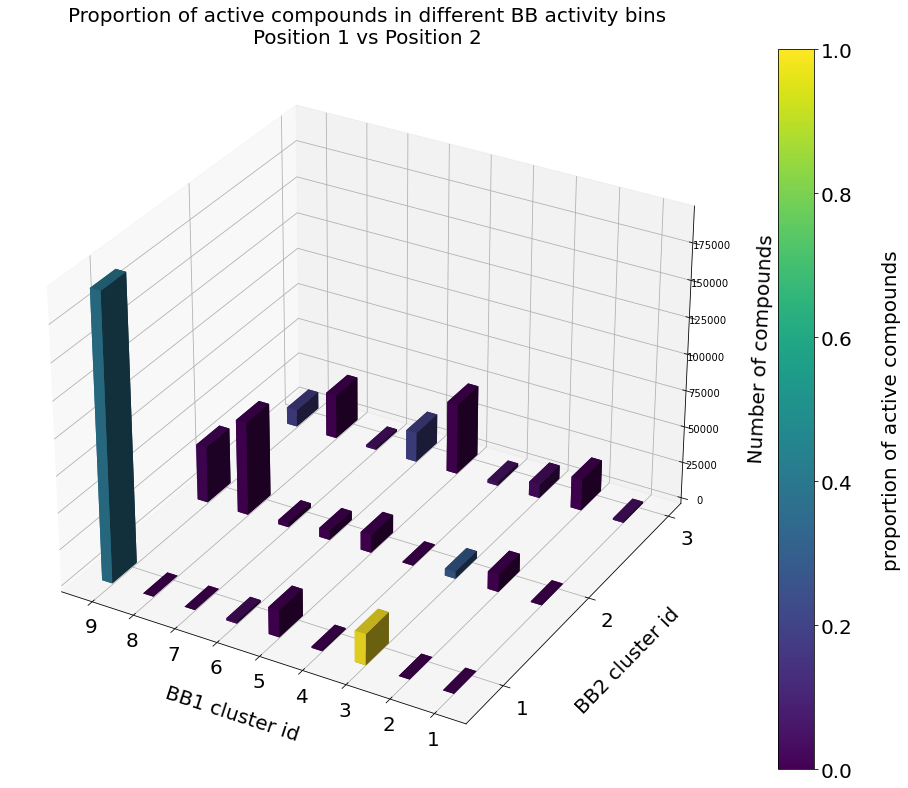

In [32]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(14,10))
# Adds 3D axes object to figure
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

color = plt.cm.viridis((combined['active_rate'] - np.min(combined['active_rate']))/(np.max(combined['active_rate'])))
cp_1_2 = ax.bar3d(xpos_1_2, ypos_1_2, zpos_1_2, dx_1_2, dy_1_2, dz_1_2, color=color)

ax.set_xticks(np.arange(0.5, 9.5))
ax.set_xticklabels(np.arange(9, 0, -1), fontsize=20, ha='left')
##ax.set_xticks(np.arange(5, -1, -1))
# ax.set_xticks(np.arange(0.25, 9.25))
# ax.set_xticklabels(labels=np.arange(9, 0, -1))
# #ax.set_xticklabels([f'{x:.2f}' for x in bb2_bins], fontsize=18, rotation=15, ha='right')
# ax.tick_params(axis='x', pad=0)

ax.set_yticks(np.arange(0.5, 3.5))
ax.set_yticklabels(np.arange(1, 4), fontsize=20, ha='left')
# ax.set_yticks(np.arange(0.5, 3.5))
# ax.set_yticklabels(labels=np.arange(3, 0, -1))
# #ax.set_yticklabels([f'{x:.2f}' for x in bb1_bins], fontsize=18, rotation=-45, ha='left')
# ax.tick_params(axis='y', pad=0)

#ax.set_zticks(np.arange(0, 8, 1))
#ax.set_zticklabels([f'$10^{x}$' for x in np.arange(0,8,1)], fontsize=18)
#ax.tick_params(axis='z', pad=10)

ax.set_xlabel('BB1 cluster id', fontsize=20, labelpad=20)
ax.set_ylabel('BB2 cluster id', fontsize=20, labelpad=25)
ax.set_zlabel('Number of compounds', fontsize=20, labelpad=25, rotation=5)
ax.set_title('Proportion of active compounds in different BB activity bins\nPosition 1 vs Position 2', fontsize=20)
cbar_1_2 = fig.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=ax, fraction=0.046)
cbar_1_2.ax.tick_params(labelsize=20)
cbar_1_2.set_label('proportion of active compounds', fontsize=20, labelpad=30)
#plt.savefig('figures/bb_1_2_3D.png', bbox_inches='tight')
#plt.show()

### To-do

Lots of different ways to work with groupbys and joins to look at how building blocks in different positions sync together. One option is to generate the 3D plot (see the DEL_paper_figures.pptx on Google Drive). 